# Chart: Consumer Price Index for All Urban Consumers (CPI-U)


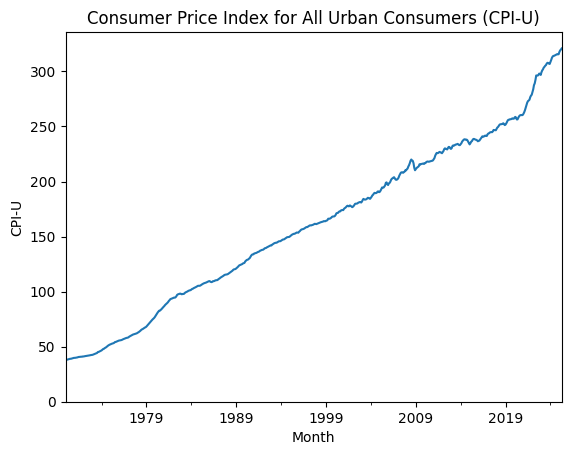

In [ ]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd

from google.colab import userdata

# https://data.bls.gov/timeseries/CUUR0000SA0

seriesid = "CUUR0000SA0"

api_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
api_input = {
    "seriesid": [seriesid],
    "startyear": "2005",
    "endyear": "2024",
    "registrationkey": userdata.get('BLS_API_KEY')
}

api_data = []
for startyear in range(1948, 2025, 20):
    api_input["startyear"] = str(startyear)
    api_input["endyear"] = str(startyear + 19)
    api_response = requests.post(api_url, json=api_input).json()

    api_data.extend(api_response['Results']['series'][0]['data'])

api_data.sort(key=lambda r: (r["year"], r["period"]))

df = pd.DataFrame(api_data)
df["value"] = pd.to_numeric(df["value"])
df["year"] = pd.to_numeric(df["year"])
df["month"] = pd.to_numeric(df["period"].replace("M", "", regex=True))
df["date"] = pd.to_datetime(df["year"].astype(str) + df["month"].astype(str), format="%Y%m")
df.set_index("date", inplace=True)

df["value"].plot()
plt.xlabel("Month")
plt.xlim(0)
plt.ylabel("CPI-U")
plt.ylim(0)
plt.title("Consumer Price Index for All Urban Consumers (CPI-U)")
plt.show()